Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

Data Description:
Murder -- Muder rates in different places of United States<br>Assualt- Assualt rate in different places of United States<br>UrbanPop - urban population in different places of United States<br>Rape - Rape rate in different places of United States


In [578]:
import pandas as pd
import numpy as np
import pandas as pd
from pandas import plotting

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# for interactive visualizations
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go

In [579]:
data_ = pd.read_csv("crime_data.csv").rename({"Unnamed: 0":"State"}, axis =1)
data_

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [580]:
data_.isnull().any().any()

False

Let's see if we can find any pattern in our multivariate data using Andrew's curve.<br>
Note: Andrews curves are a method for visualizing multidimensional data by mapping each observation onto a function.<br>Andrews curves that are represented by functions close together suggest that the corresponding data points will also be close together.

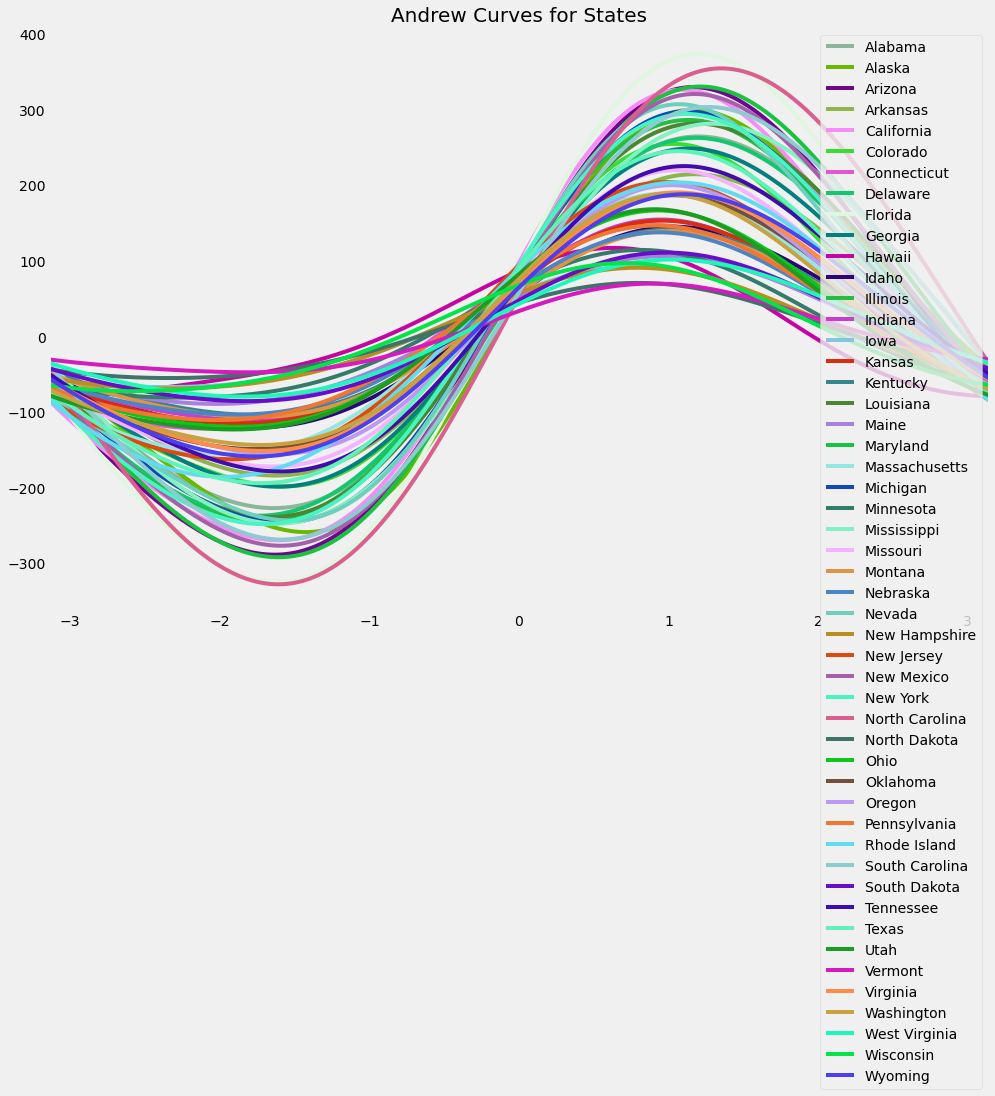

In [581]:
plt.rcParams['figure.figsize'] = (15, 10)


plotting.andrews_curves(data_, "State")
plt.title('Andrew Curves for States', fontsize = 20)
plt.show()

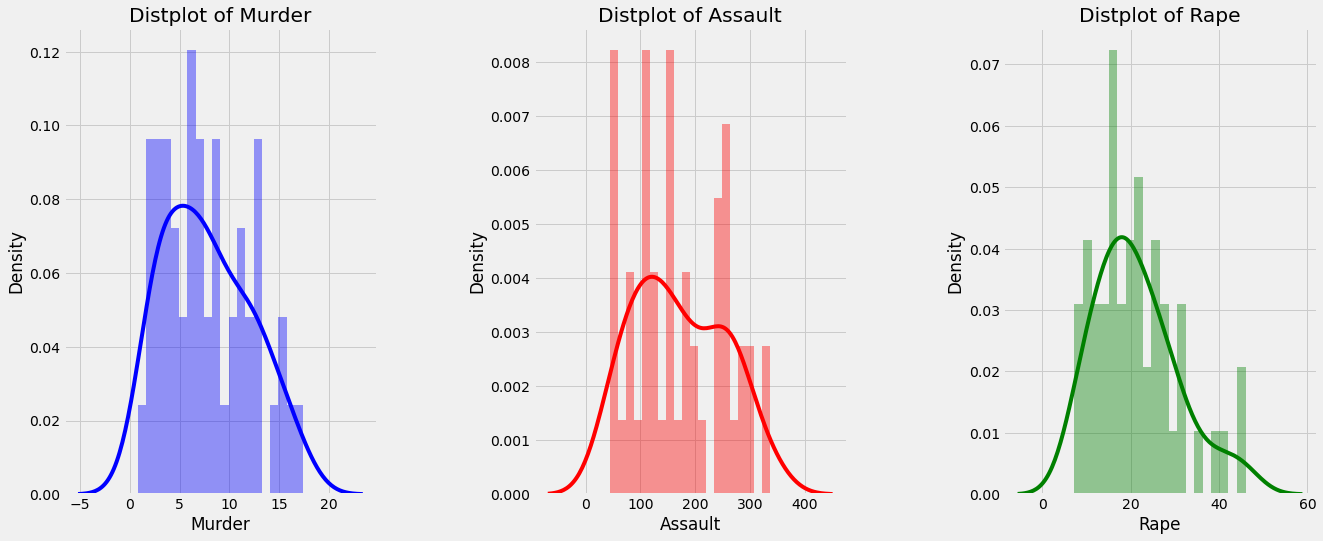

In [582]:
import warnings
warnings.filterwarnings('ignore')


plt.figure(1 , figsize = (20 , 8))
n = 0 
for x , i in zip(['Murder' , 'Assault' , 'Rape'], ['blue', 'red', 'green']):
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(data_[x] , bins = 20, color = i)
    plt.title('Distplot of {}'.format(x))
plt.show()

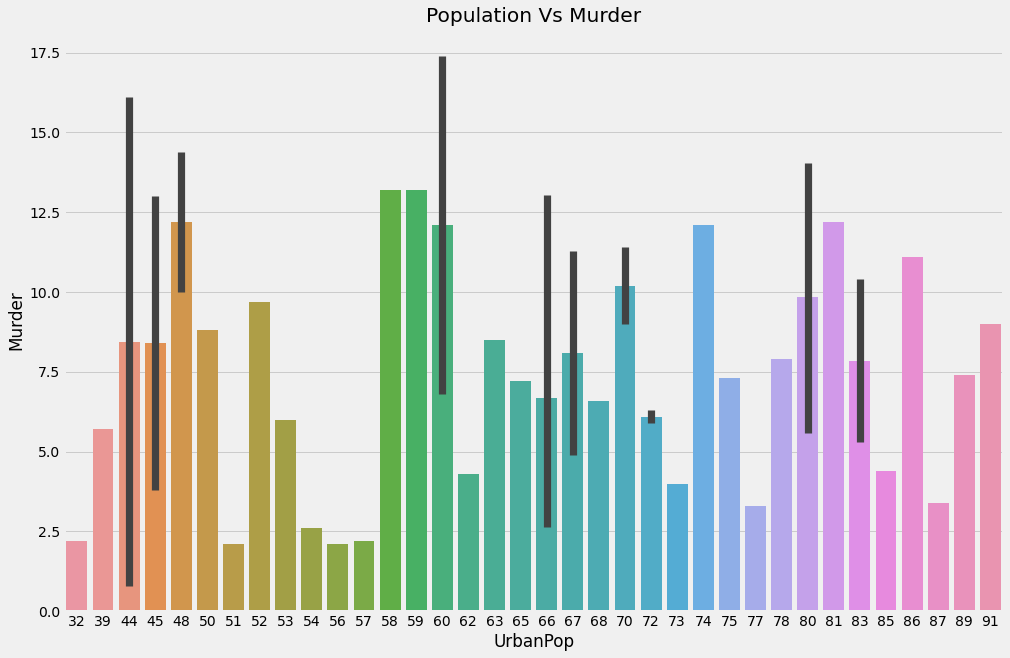

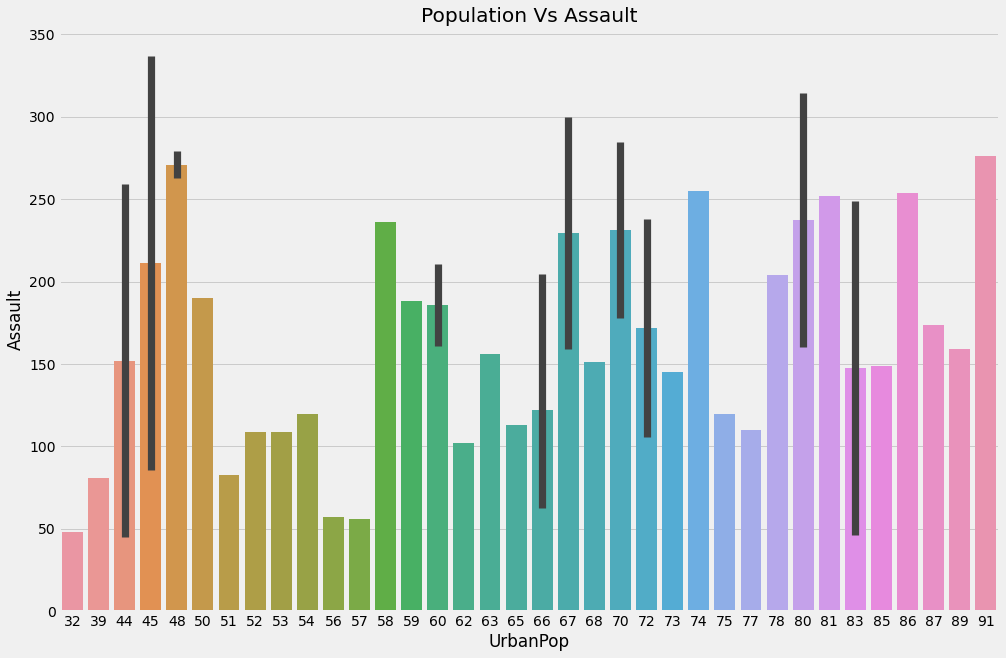

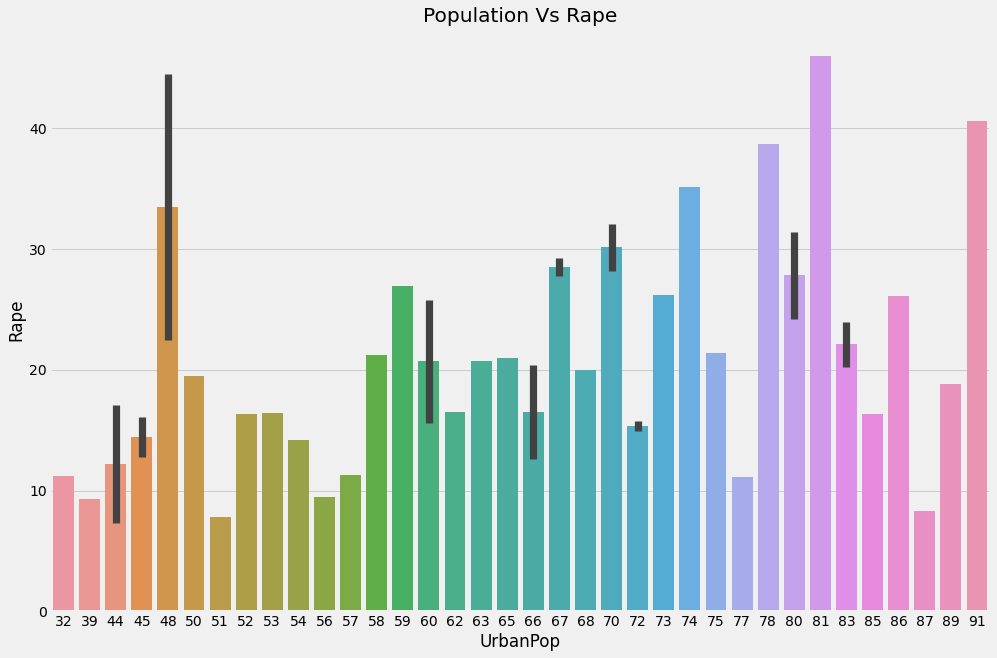

In [583]:
for i in ["Murder", "Assault", "Rape"]:
    sns.barplot(x="UrbanPop", y=i, data=data_)
    plt.title('Population Vs {}'.format(i))
    plt.show()

Relation between all the variables

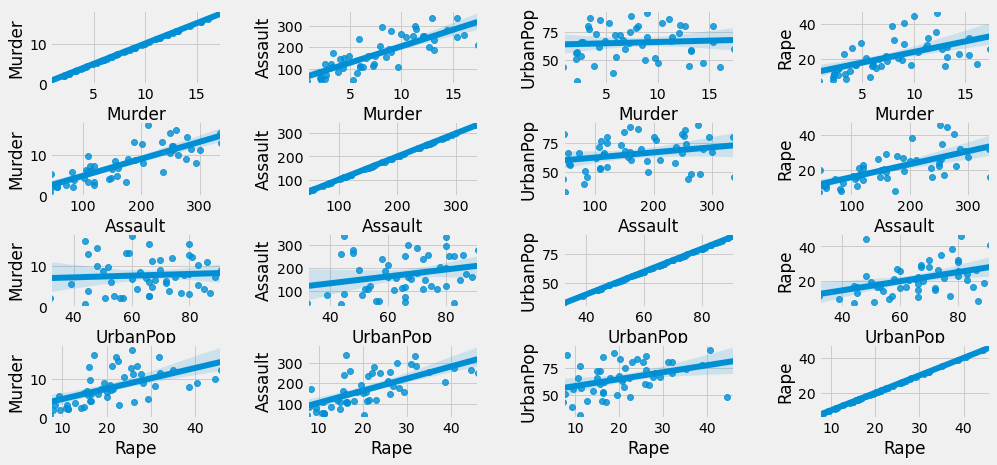

In [584]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for x in ['Murder', 'Assault', 'UrbanPop', 'Rape']:
    for y in ['Murder', 'Assault', 'UrbanPop', 'Rape']:
        n += 1
        plt.subplot(4 , 4 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = data_)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

In [585]:
from sklearn import preprocessing
crime_rates_standardized = preprocessing.scale(data_[['Murder', 'Assault', 'UrbanPop', 'Rape']])
print(crime_rates_standardized)
crime_data = pd.DataFrame(crime_rates_standardized)

[[ 1.25517927  0.79078716 -0.52619514 -0.00345116]
 [ 0.51301858  1.11805959 -1.22406668  2.50942392]
 [ 0.07236067  1.49381682  1.00912225  1.05346626]
 [ 0.23470832  0.23321191 -1.08449238 -0.18679398]
 [ 0.28109336  1.2756352   1.77678094  2.08881393]
 [ 0.02597562  0.40290872  0.86954794  1.88390137]
 [-1.04088037 -0.73648418  0.79976079 -1.09272319]
 [-0.43787481  0.81502956  0.45082502 -0.58583422]
 [ 1.76541475  1.99078607  1.00912225  1.1505301 ]
 [ 2.22926518  0.48775713 -0.38662083  0.49265293]
 [-0.57702994 -1.51224105  1.21848371 -0.11129987]
 [-1.20322802 -0.61527217 -0.80534376 -0.75839217]
 [ 0.60578867  0.94836277  1.21848371  0.29852525]
 [-0.13637203 -0.70012057 -0.03768506 -0.0250209 ]
 [-1.29599811 -1.39102904 -0.5959823  -1.07115345]
 [-0.41468229 -0.67587817  0.03210209 -0.34856705]
 [ 0.44344101 -0.74860538 -0.94491807 -0.53190987]
 [ 1.76541475  0.94836277  0.03210209  0.10439756]
 [-1.31919063 -1.06375661 -1.01470522 -1.44862395]
 [ 0.81452136  1.56654403  0.10

In [586]:
# K-Means clustering
X1 = crime_data.iloc[:,:].values
X = crime_data.iloc[:,:].values
X2 = data_.iloc[:,1:].values

In [587]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

wcss =[]
s_scores = []
for i in range(1,11): # Silhoutte score reqy=uires more than one cluster otherwise it will throw an error
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=111, algorithm = 'elkan')
    kmeans.fit(X1)
    #print(np.unique(kmeans.labels_))
    if i!=1:
        silhouette_avg = silhouette_score(X1, kmeans.labels_)
    else:
        silhouette_avg=0
    
    print("K-Means: for n_clusters =", i, ", the average silhouette_score is", silhouette_avg)
    
    wcss.append(kmeans.inertia_)
    s_scores.append(silhouette_avg)

K-Means: for n_clusters = 1 , the average silhouette_score is 0
K-Means: for n_clusters = 2 , the average silhouette_score is 0.4084890326217641
K-Means: for n_clusters = 3 , the average silhouette_score is 0.313918284155625
K-Means: for n_clusters = 4 , the average silhouette_score is 0.33968891433344395
K-Means: for n_clusters = 5 , the average silhouette_score is 0.2968626678243933
K-Means: for n_clusters = 6 , the average silhouette_score is 0.2868084101057388
K-Means: for n_clusters = 7 , the average silhouette_score is 0.28529392224441935
K-Means: for n_clusters = 8 , the average silhouette_score is 0.268959550450009
K-Means: for n_clusters = 9 , the average silhouette_score is 0.2637545284502651
K-Means: for n_clusters = 10 , the average silhouette_score is 0.26617127317033273


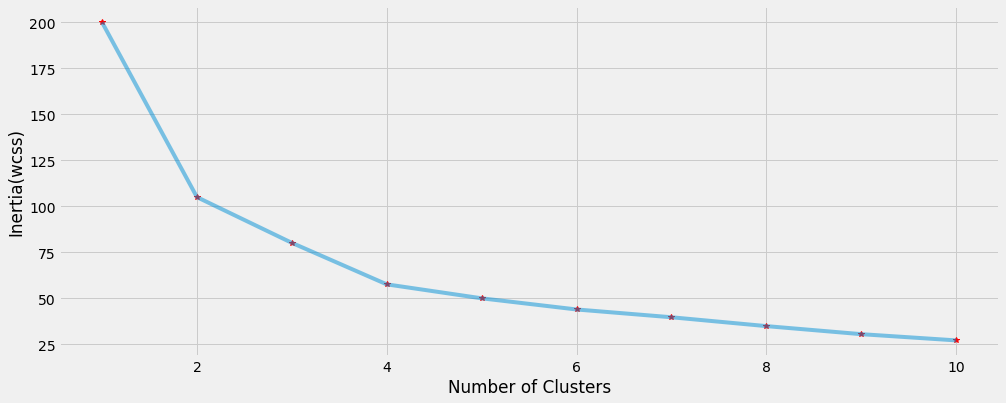

In [588]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , wcss , '*', color ='red')
plt.plot(np.arange(1 , 11) , wcss , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia(wcss)')
plt.show()

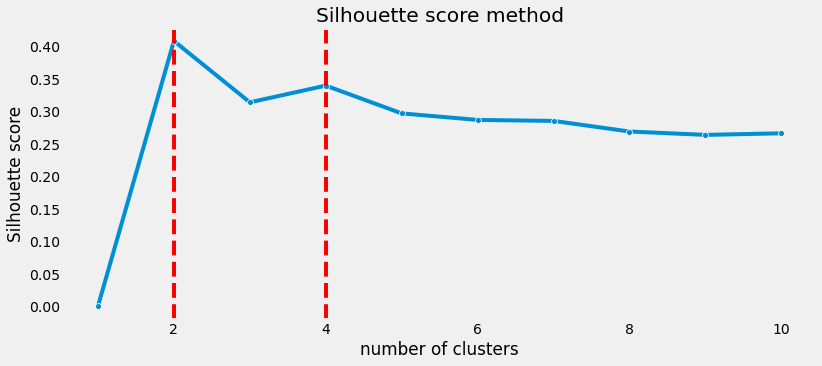

In [591]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(np.arange(1 , 11), s_scores, marker='o', ax=ax)
ax.set_title("Silhouette score method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("Silhouette score")
ax.axvline(2, ls="--", c="red")
ax.axvline(4, ls="--", c="red")
plt.grid()
plt.show()

In [592]:
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=111, algorithm = 'elkan')
y_kmeans = kmeans.fit_predict(X1)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [593]:
print(y_kmeans)

[0 0 0 1 0 0 1 1 0 0 1 1 0 1 1 1 1 0 1 0 1 0 1 0 0 1 1 0 1 1 0 0 0 1 1 1 1
 1 1 0 1 0 0 1 1 1 1 1 1 1]


In [594]:
data_

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [595]:
y_kmeans_1 = y_kmeans +1
clusters = list(y_kmeans_1)
data_["Cluster"] = clusters
data_

,State,Murder,Assault,UrbanPop,Rape,Cluster
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,2
7,Delaware,5.9,238,72,15.8,2
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,1


<AxesSubplot:xlabel='Murder', ylabel='Assault'>

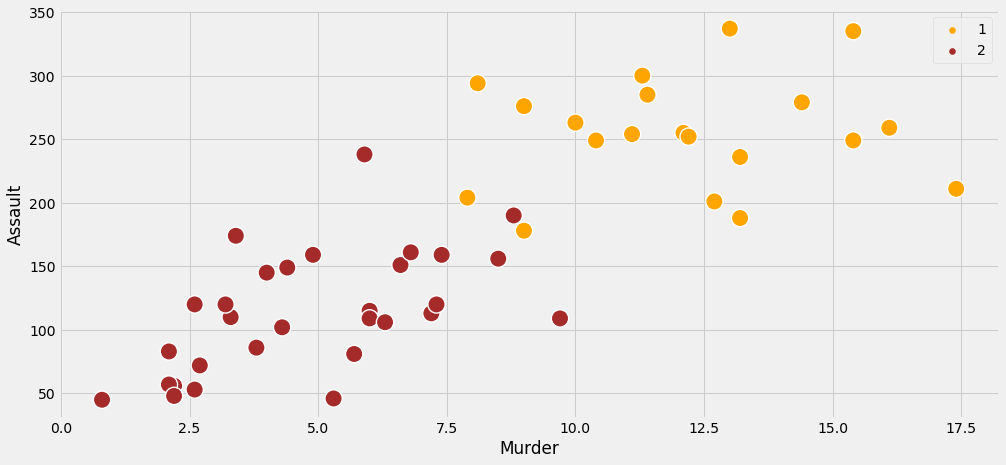

In [596]:
import seaborn as sns

plt.figure(figsize=(15,7))
sns.scatterplot(x=data_['Murder'], y = data_['Assault'],hue=y_kmeans_1, s=300, palette=['orange','brown'], legend='full')

<AxesSubplot:xlabel='Rape', ylabel='Assault'>

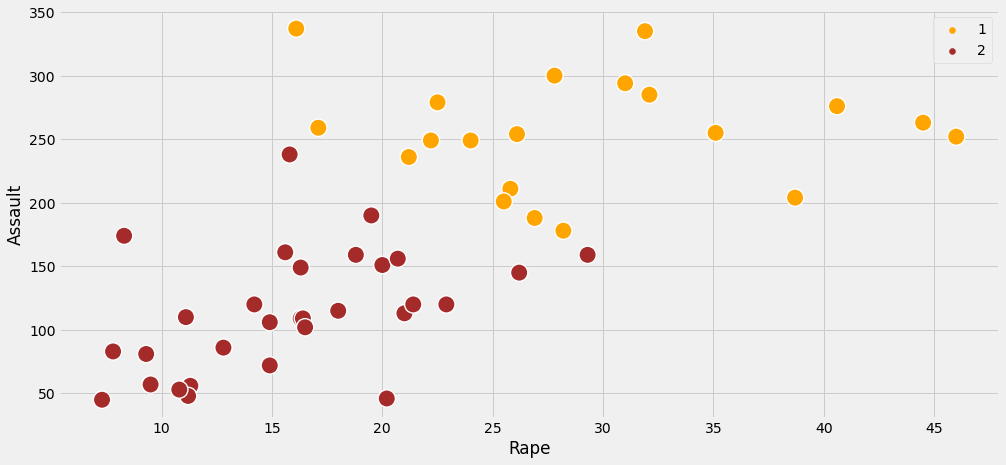

In [597]:
import seaborn as sns

plt.figure(figsize=(15,7))
sns.scatterplot(x=data_['Rape'], y = data_['Assault'],hue=y_kmeans_1, s=300, palette=['orange','brown'], legend='full')

In [598]:
data_

,State,Murder,Assault,UrbanPop,Rape,Cluster
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,2
7,Delaware,5.9,238,72,15.8,2
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,1


In [599]:

data_['label'] =  labels
trace1 = go.Scatter3d(
    x= data_['Murder'],
    y= data_['Assault'],
    z= data_['Rape'],
   # z1= crime_data['UrbanPop'],
    mode='markers',
     marker=dict(
        color = data_['label'], 
        size= 5,
        line=dict(
            color= data_['label'],
            width= 12
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
#     margin=dict(
#         l=0,
#         r=0,
#         b=0,
#         t=0
#     )
    title= 'Clusters',
    scene = dict(
            xaxis = dict(title  = 'Murder'),
            yaxis = dict(title  = 'Assault'),
            zaxis = dict(title  = 'Rape')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

******************** TODO: validation using SIlhoutee clustering
********************** TODO: try with 2 parameters at a time like Murder- Assault, Rape-Assault and then Murder Assault Rape, refere a notebook from Kaggle in Documents
https://www.kaggle.com/kushal1996/customer-segmentation-k-means-analysis

### Hierarchical clustering


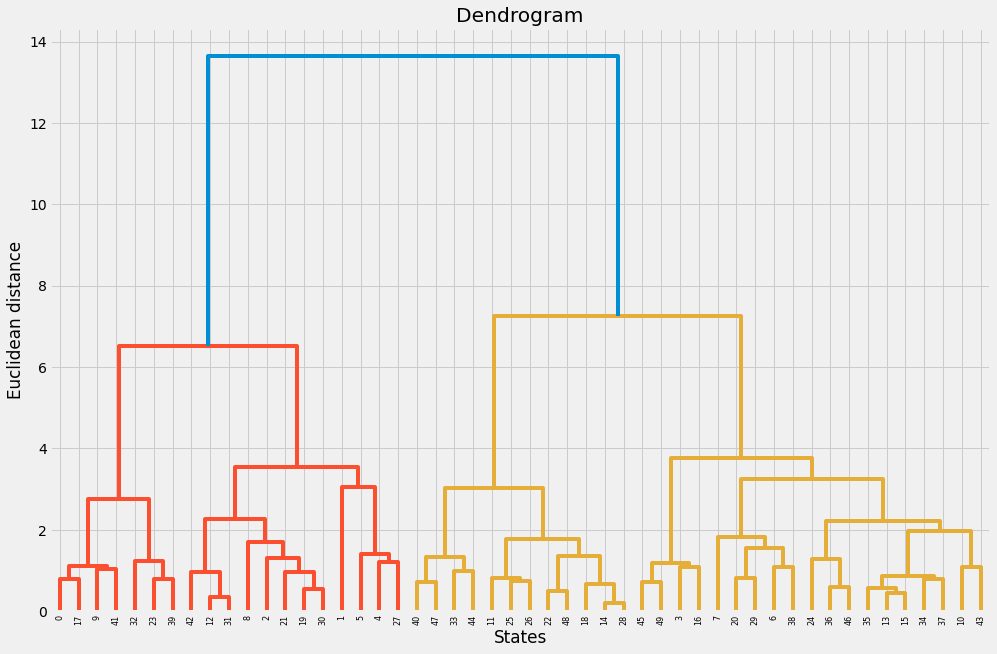

In [600]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X1, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('States')
plt.ylabel('Euclidean distance')
plt.show()



In [601]:
from sklearn.cluster import AgglomerativeClustering
HC = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage = 'ward')
y_HC = HC.fit_predict(X1)

In [602]:
y_HC_1 = y_HC +1
clusters2 = list(y_HC_1)
data_["HierarchicalCluster"] = clusters2
data_.head()

,State,Murder,Assault,UrbanPop,Rape,Cluster,label,HierarchicalCluster
0,Alabama,13.2,236,58,21.2,1,0,2
1,Alaska,10.0,263,48,44.5,1,0,2
2,Arizona,8.1,294,80,31.0,1,0,2
3,Arkansas,8.8,190,50,19.5,2,1,1
4,California,9.0,276,91,40.6,1,0,2


<AxesSubplot:xlabel='Rape', ylabel='Assault'>

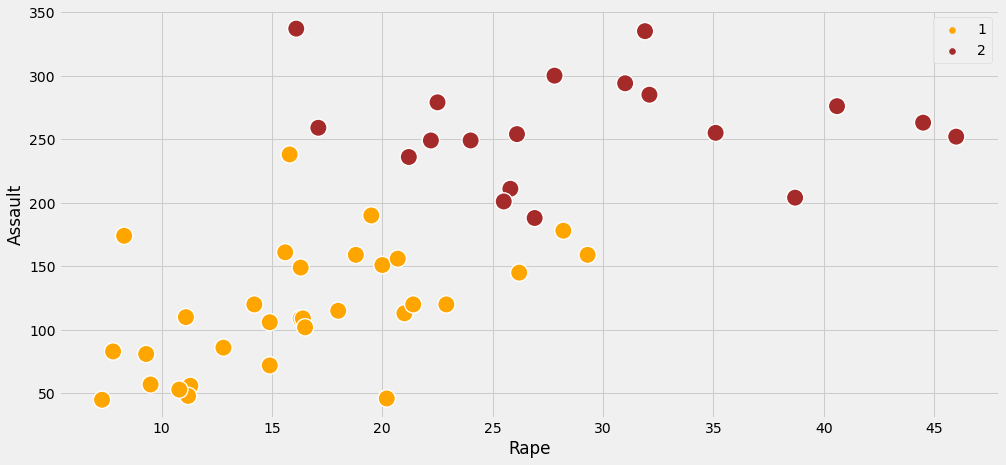

In [603]:
import seaborn as sns

plt.figure(figsize=(15,7))
sns.scatterplot(x=data_['Rape'], y = data_['Assault'],hue=y_HC_1, s=300, palette=['orange','brown'], legend='full')

<AxesSubplot:xlabel='Murder', ylabel='Assault'>

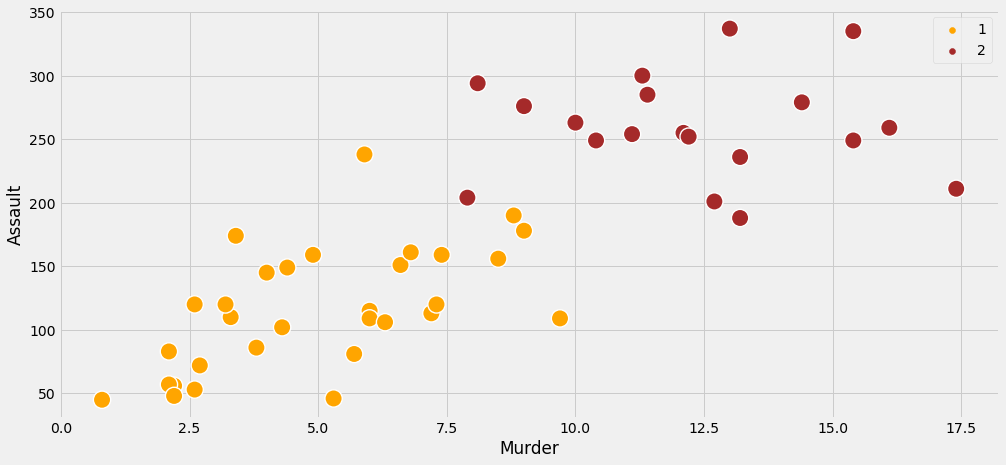

In [604]:
import seaborn as sns

plt.figure(figsize=(15,7))
sns.scatterplot(x=data_['Murder'], y = data_['Assault'],hue=y_HC_1, s=300, palette=['orange','brown'], legend='full')

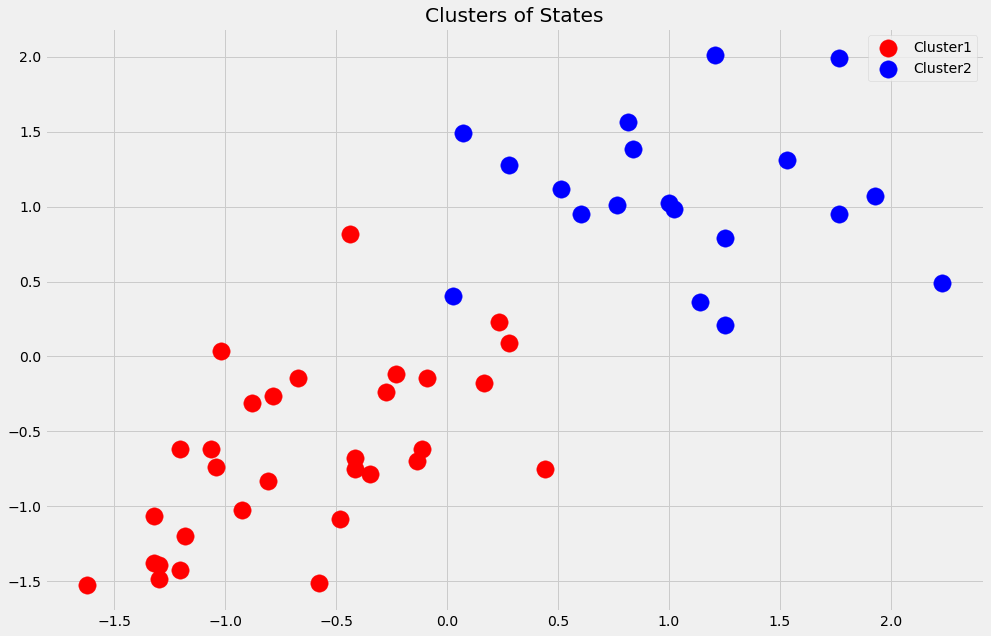

In [605]:
#alternate way
plt.scatter(X1[y_HC == 0,0], X1[y_HC == 0,1], s=300, c='red', label = 'Cluster1')
plt.scatter(X1[y_HC == 1,0], X1[y_HC == 1,1], s=300, c='blue', label = 'Cluster2')
#plt.scatter(X1[y_HC == 2,0], X1[y_HC == 2,1], s=300, c='green', label = 'Cluster3')
#plt.scatter(X1[y_HC == 3,0], X1[y_HC == 3,1], s=300, c='orange', label = 'Cluster4')
plt.title("Clusters of States")
plt.legend()
plt.show()

### DBSCAN 

In [606]:
from sklearn.cluster import DBSCAN


In [607]:
from itertools import product
eps_values = np.arange(1,1.5,0.05)
min_samples = np.arange(3,10)
DBSCAN_params = list(product(eps_values, min_samples))
#DBSCAN_params

In [608]:
no_clusters = []
si_score = []

for i in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=i[0], min_samples=i[1]).fit(X1)
    no_clusters.append(len(np.unique(DBS_clustering.labels_)))
    #print(len(np.unique(DBS_clustering.labels_)))
    if len(np.unique(DBS_clustering.labels_)) >1:
        si_score.append(silhouette_score(X1,DBS_clustering.labels_))
    else:
        si_score.append(0)
    
    

In [609]:
plot_data = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
plot_data['No_of_clusters'] = no_clusters

pivot_1 = pd.pivot_table(plot_data, values='No_of_clusters', index='Min_samples', columns='Eps')



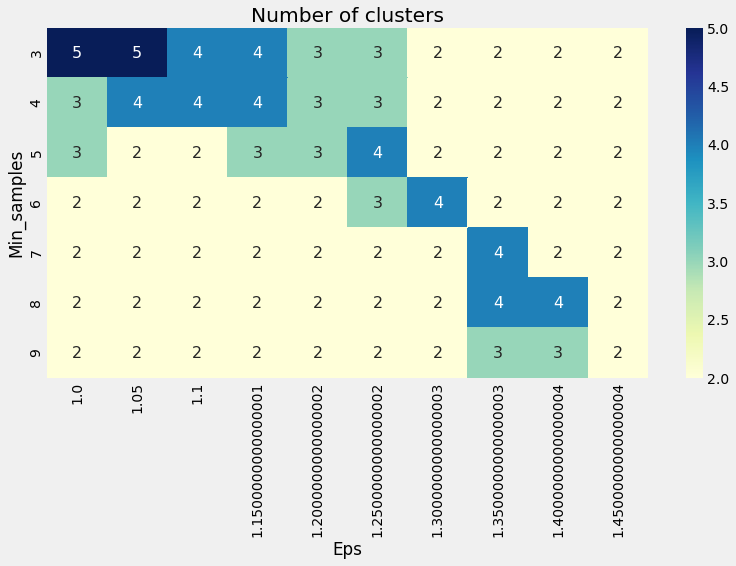

In [610]:
fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
plt.show()

In [611]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['Sil_score'] = si_score

pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')


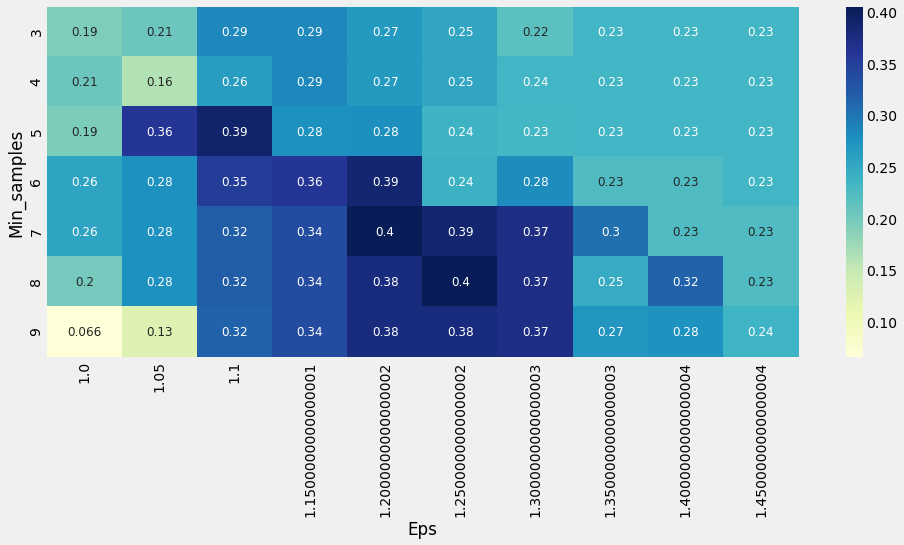

In [612]:
fig, ax = plt.subplots(figsize=(15,6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 12}, cmap="YlGnBu", ax=ax)
plt.show()

#### Alternate way

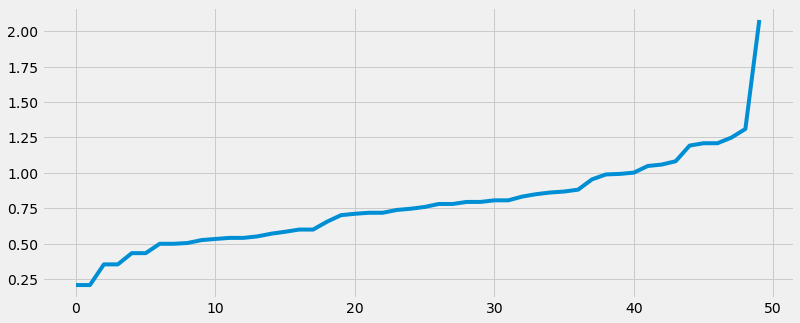

In [613]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X1)
distances, indices = nbrs.kneighbors(X1)
distances = np.sort(distances, axis = 0)
distances = distances[:,1]

fig, ax = plt.subplots(figsize=(12,5))
plt.plot(distances)
#ax.axvline(46, ls="--", c="red")

#ax.axhline(24, ls="--", c="red")

### Add comments similar to https://www.kaggle.com/datark1/customers-clustering-k-means-dbscan-and-ap

In [614]:

DBS_clustering = DBSCAN(eps=1.25, min_samples=5).fit(X1)

DBSCAN_clustered = data_.copy()
DBSCAN_clustered_ = data_.copy()
DBSCAN_clustered.loc[:,'Cluster2'] = DBS_clustering.labels_
DBSCAN_clustered_.loc[:,'Cluster2'] = DBS_clustering.labels_+1
DBSCAN_clustered

,State,Murder,Assault,UrbanPop,Rape,Cluster,label,HierarchicalCluster,Cluster2
0,Alabama,13.2,236,58,21.2,1,0,2,0
1,Alaska,10.0,263,48,44.5,1,0,2,-1
2,Arizona,8.1,294,80,31.0,1,0,2,1
3,Arkansas,8.8,190,50,19.5,2,1,1,2
4,California,9.0,276,91,40.6,1,0,2,-1
5,Colorado,7.9,204,78,38.7,1,0,2,1
6,Connecticut,3.3,110,77,11.1,2,1,1,2
7,Delaware,5.9,238,72,15.8,2,1,1,2
8,Florida,15.4,335,80,31.9,1,0,2,-1
9,Georgia,17.4,211,60,25.8,1,0,2,0


In [615]:
# Cluster sizes
DBSCAN_clust_sizes = DBSCAN_clustered_.groupby('Cluster2').size().to_frame()
DBSCAN_clust_sizes.columns = ["DBSCAN_size"]
DBSCAN_clust_sizes
#0th cluster here indicates Outliers

,DBSCAN_size
Cluster2,
0,6
1,5
2,7
3,32


In [616]:
outliers = DBSCAN_clustered[DBSCAN_clustered["Cluster2"] == -1]


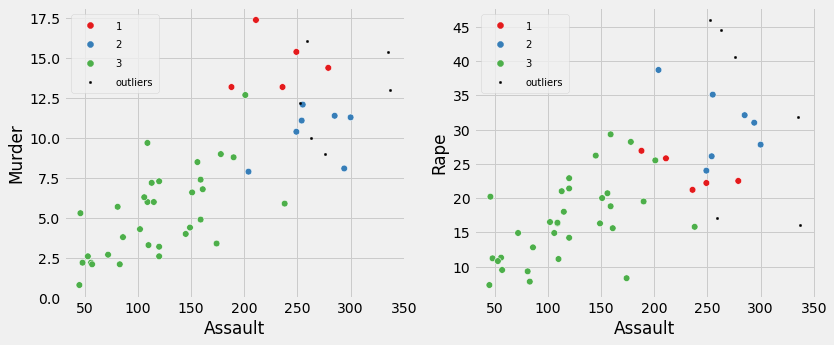

In [617]:
fig2, (axes) = plt.subplots(1,2,figsize=(12,5))


sns.scatterplot('Assault', 'Murder',
                data=DBSCAN_clustered_[DBSCAN_clustered_['Cluster2']!=0],
                hue='Cluster2', ax=axes[0], palette='Set1', legend='full', s=45)

sns.scatterplot('Assault', 'Rape',
                data=DBSCAN_clustered_[DBSCAN_clustered_['Cluster2']!=0],
                hue='Cluster2', palette='Set1', ax=axes[1], legend='full', s=45)

axes[0].scatter(outliers['Assault'], outliers['Murder'], s=5, label='outliers', c="k")
axes[1].scatter(outliers['Assault'], outliers['Rape'], s=5, label='outliers', c="k")
axes[0].legend()
axes[1].legend()

plt.setp(axes[0].get_legend().get_texts(), fontsize='10')
plt.setp(axes[1].get_legend().get_texts(), fontsize='10')

plt.show()

In [618]:
#TODO: AFFINITY algorithm
data_

,State,Murder,Assault,UrbanPop,Rape,Cluster,label,HierarchicalCluster
0,Alabama,13.2,236,58,21.2,1,0,2
1,Alaska,10.0,263,48,44.5,1,0,2
2,Arizona,8.1,294,80,31.0,1,0,2
3,Arkansas,8.8,190,50,19.5,2,1,1
4,California,9.0,276,91,40.6,1,0,2
5,Colorado,7.9,204,78,38.7,1,0,2
6,Connecticut,3.3,110,77,11.1,2,1,1
7,Delaware,5.9,238,72,15.8,2,1,1
8,Florida,15.4,335,80,31.9,1,0,2
9,Georgia,17.4,211,60,25.8,1,0,2


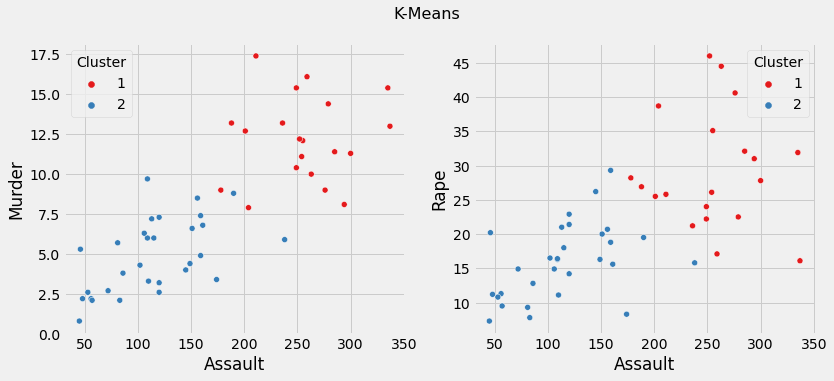

In [619]:
fig11, (axes) = plt.subplots(1,2,figsize=(12,5))

sns.scatterplot('Assault', 'Murder', data=data_,
                hue='Cluster', ax=axes[0], palette='Set1', legend='full')

sns.scatterplot('Assault', 'Rape', data=data_,
                hue='Cluster', palette='Set1', ax=axes[1], legend='full')

# plotting centroids
fig11.suptitle('K-Means', fontsize=16)
plt.show()

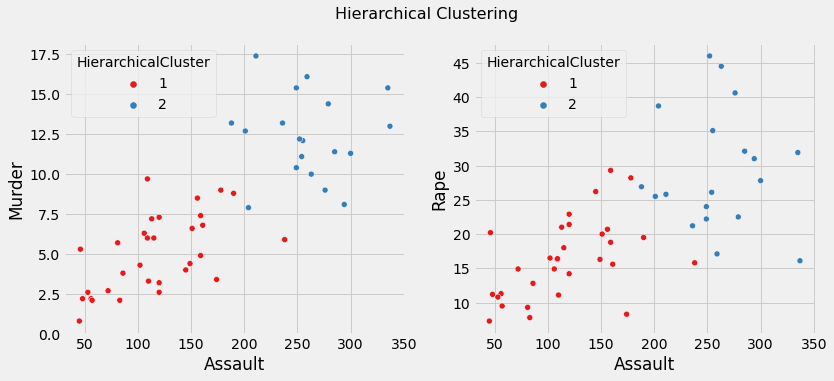

In [620]:
#HierarchicalCluster
fig22, (axes) = plt.subplots(1,2,figsize=(12,5))

sns.scatterplot('Assault', 'Murder', data=data_,
                hue='HierarchicalCluster', ax=axes[0], palette='Set1', legend='full')

sns.scatterplot('Assault', 'Rape', data=data_,
                hue='HierarchicalCluster', palette='Set1', ax=axes[1], legend='full')

# plotting centroids
#axes[0].scatter(kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,0], marker='s', s=40, c="blue")
#axes[1].scatter(kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,3], marker='s', s=40, c="blue")
fig22.suptitle('Hierarchical Clustering', fontsize=16)
plt.show()

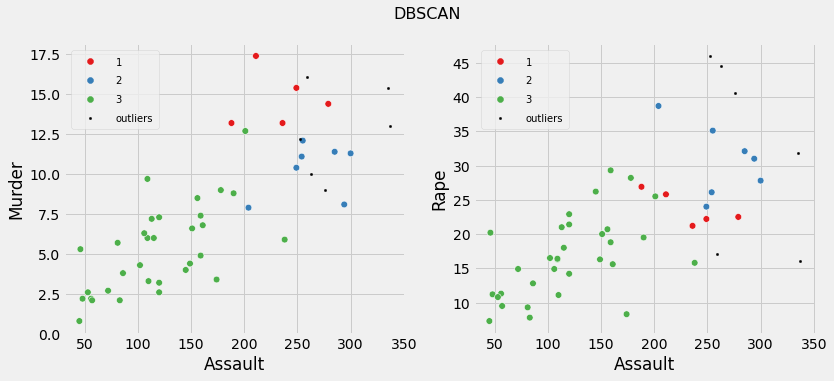

In [621]:
fig2.suptitle('DBSCAN', fontsize=16)
fig2

In [622]:
kmeans_clust_sizes = data_.groupby('Cluster').size().to_frame()
kmeans_clust_sizes.columns = ["kmeans_size"]
kmeans_clust_sizes

,kmeans_size
Cluster,
1,20
2,30


In [623]:
HC_clust_sizes = data_.groupby('HierarchicalCluster').size().to_frame()
HC_clust_sizes.columns = ["HC_size"]
HC_clust_sizes

,HC_size
HierarchicalCluster,
1,31
2,19


In [624]:
clusters = pd.concat([kmeans_clust_sizes, HC_clust_sizes, DBSCAN_clust_sizes],axis=1, sort=False)
clusters

,kmeans_size,HC_size,DBSCAN_size
0,NaN,NaN,6
1,20.0,31.0,5
2,30.0,19.0,7
3,NaN,NaN,32
